# B2B Ecommerce Fraud Case Study 📦
Analyzing courier charge discrepancies in B2B transactions.

In [22]:
import pandas as pd

order_report = pd.read_csv('Order Report.csv')
sku_master = pd.read_csv('SKU Master.csv')
pincode_mapping = pd.read_csv('pincodes.csv')
courier_invoice = pd.read_csv('Invoice.csv')
courier_company_rates = pd.read_csv('Courier Company - Rates.csv')

In [23]:
print("Order Report:")
print(order_report.head())
print("\nSKU Master:")
print(sku_master.head())
print("\nPincode Mapping:")
print(pincode_mapping.head())
print("\nCourier Invoice:")
print(courier_invoice.head())
print("\nCourier Company rates:")
print(courier_company_rates.head())

Order Report:
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN

SKU Master:
             SKU  Weight (g)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  8904223815682         210         NaN         NaN         NaN
1  8904223815859         165         NaN         NaN         NaN
2  8904223815866         113         NaN         NaN         NaN
3  8904223815873          65         NaN         NaN         NaN
4  8904223816214         120         NaN         NaN         NaN

Pincode Mapping:
   Warehouse Pincode  Customer Pincode Zone  Unnamed: 3  Unnamed: 4
0             121003            507101    d         NaN         NaN
1             121003       

In [24]:
# Check for missing values
print("\nMissing values in Website Order Report:")
print(order_report.isnull().sum())
print("\nMissing values in SKU Master:")
print(sku_master.isnull().sum())
print("\nMissing values in Pincode Mapping:")
print(pincode_mapping.isnull().sum())
print("\nMissing values in Courier Invoice:")
print(courier_invoice.isnull().sum())
print("\nMissing values in courier company rates:")
print(courier_company_rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing values in SKU Master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing values in Pincode Mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing values in Courier Invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing values in courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed        

Cleaning missing data


In [25]:
# Remove unnamed columns from the Website Order Report DataFrame
order_report = order_report.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the SKU Master DataFrame
sku_master = sku_master.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the Pincode Mapping DataFrame
pincode_mapping = pincode_mapping.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

Once we have cleaning missing data and eliminated it, we can proceed with structuring the datasets. Our common column is SKU, so lets merge order_report with sku_master on SKU

In [26]:
#Merging order report nd SKU master based on SKU
merged_data = pd.merge(order_report, sku_master, on = "SKU")
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350


In [27]:
# Rename the "ExternOrderNo" column to "Order ID" in the merged_data DataFrame
merged_data = merged_data.rename(columns={'ExternOrderNo':'Order ID'})
merged_data.head()

,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350


In [28]:
abc_courier = pincode_mapping.drop_duplicates(subset=['Customer Pincode'])
courier_abc = courier_invoice[['Order ID', 'Customer Pincode','Type of Shipment']]
pincodes= courier_abc.merge(abc_courier,on='Customer Pincode')

pincodes.head()

,Order ID,Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001806232,507101,Forward charges,121003,d
1,2001806273,486886,Forward charges,121003,d
2,2001806408,532484,Forward charges,121003,d
3,2001806458,143001,Forward charges,121003,b
4,2001807012,515591,Forward charges,121003,d


In [29]:
pincodes.describe()

,Order ID,Customer Pincode,Warehouse Pincode
count,1.240000e+02,124.000000,124.0
mean,2.001811e+09,365488.072581,121003.0
std,5.167329e+03,152156.322130,0.0
min,2.001806e+09,140301.000000,121003.0
25%,2.001807e+09,302017.000000,121003.0
50%,2.001809e+09,321304.500000,121003.0
75%,2.001812e+09,405102.250000,121003.0
max,2.001827e+09,845438.000000,121003.0


In [32]:
# Merging pincodes with the main dataframe.
merged2 = merged_data.merge(pincodes, on = 'Order ID')
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e


In [33]:
#calculate the weight in kilograms by dividing the ‘Weight (g)’ column in the ‘merged2’ DataFrame by 1000:
merged2['Weight (Kgs)'] = merged2['Weight (g)'] / 1000

In [34]:
def weight_slab(weight):
    i = round(weight % 1, 1)
    if i == 0.0:
        return weight
    elif i > 0.5:
        return int(weight) + 1.0
    else:
        return int(weight) + 0.5

merged2['Weight Slab (KG)'] = merged2['Weight (Kgs)'].apply(weight_slab)
courier_invoice['Weight Slab Charged by Courier Company']=(courier_invoice['Charged Weight']).apply(weight_slab)

In [35]:
#rename the columns to prepare the desired dataframe:

courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
merged2 = merged2.rename(columns={'Weight Slab (KG)': 'Weight Slab As Per ABC'})

- In this code, we loop through each row of the ‘merged2’ DataFrame to calculate the expected charges based on ABC’s tariffs. We retrieve the necessary rates and parameters, such as fixed charges and surcharges per weight tier for forward and RTO shipments, based on the delivery area.
- We then determine the weight of the slab for each row. If the shipment type is ‘Forward Charges’, we calculate the additional weight beyond the basic weight slab (0.5 KG) and apply the corresponding additional charges. For “Forward and RTO Charges” shipments, we consider additional charges for term and RTO components.
- Finally, we store the calculated expected charges in the “Expected charges according to ABC” column of the “merged2” DataFrame. This allows us to compare the expected charges with the charges billed to analyze the accuracy of the courier company’s charges.

In [ ]:
# Expected charges Calculation  

total_expected_charge = []

for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)

merged2['Expected Charge as per ABC'] = total_expected_charge
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone As Per ABC,Weight (Kgs),Weight Slab As Per ABC,Expected Charge as per ABC
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5,56.6
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5,56.6
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100,0.5,56.6
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165,0.5,56.6
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350,0.5,56.6


In [37]:
merged_output = merged2.merge(courier_invoice, on='Order ID')
print(merged_output.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706        1.0         127              173213   
1  2001827036  8904223819093        1.0         150              173213   
2  2001827036  8904223819109        1.0         100              173213   
3  2001827036  8904223818430        1.0         165              173213   
4  2001827036  8904223819277        1.0         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per ABC  \
0    Forward charges               121003                        e   
1    Forward charges               121003                        e   
2    Forward charges               121003                        e   
3    Forward charges               121003                        e   
4    Forward charges               121003                        e   

   Weight (Kgs)  Weight Slab As Per ABC  Expected Charge as per ABC  \
0         0.127                     0.5                  

In [38]:
#Calculate the differences in charges and expected charges for each order:

df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected Charge as per ABC']]

print(df_new.head())


     Order ID  Difference (Rs.)  Expected Charge as per ABC
0  2001827036              61.3                        56.6
1  2001827036              61.3                        56.6
2  2001827036              61.3                        56.6
3  2001827036              61.3                        56.6
4  2001827036              61.3                        56.6


Summarizing the accuracy of B2B courier charges based on the charged prices and expected prices:

In [39]:
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# Calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum())
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected Charge as per ABC'].sum()

# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (Rs.)
0  Total Orders where ABC has been correctly charged     12         507.6
1        Total Orders where ABC has been overcharged    382       33750.5
2       Total Orders where ABC has been undercharged      7        -165.2


In [40]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=df_summary['Description'],
                            values=df_summary['Count'],
                            textinfo='label+percent',
                            hole=0.4))
fig.update_layout(title='Proportion')

fig.show()


Zone vs. Weight Slab Heatmap
Show how overcharges vary across combinations of delivery zones and weight slabs.

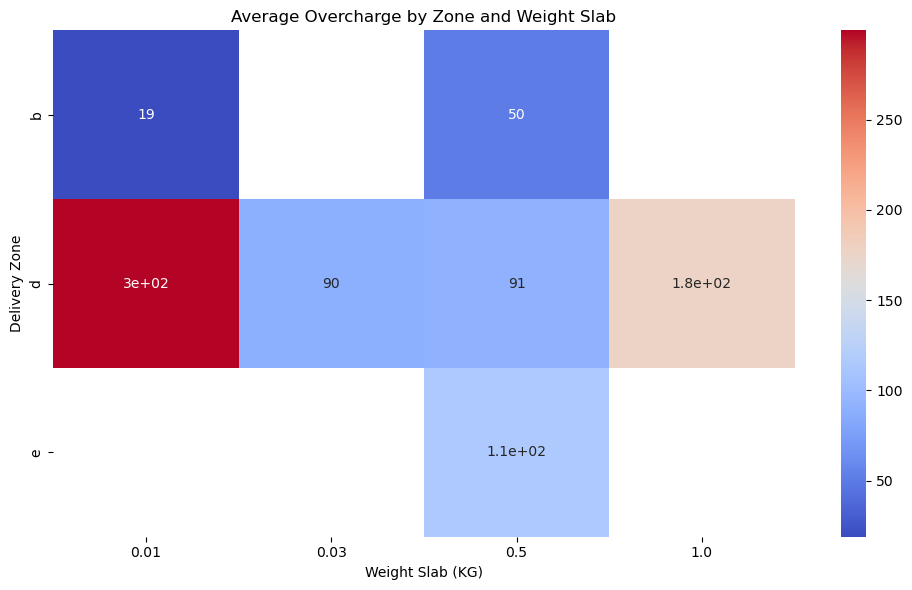

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = merged_output.pivot_table(
    index='Delivery Zone Charged by Courier Company',
    columns='Weight Slab As Per ABC',
    values='Difference (Rs.)',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title("Average Overcharge by Zone and Weight Slab")
plt.ylabel("Delivery Zone")
plt.xlabel("Weight Slab (KG)")
plt.tight_layout()
plt.show()


What you're looking at:
This heatmap shows the average overcharge (in Rupees) across:

Zones on the y-axis (e.g. zone b, d, e)

Weight slabs on the x-axis (e.g. 0.01 KG, 0.5 KG, 1.0 KG)

Each number is the average difference between what you were charged vs. what you expected for that zone+weight combo.

For example:

Zone d, 0.01 KG shows a value around 300, which means on average, shipments in that category were overcharged by ₹300 per order — that's huge.

Zone b, 0.5 KG shows 50, so overcharged by ₹50 on average.

Empty boxes just mean there was no data for that combination (no orders with that zone and weight).

It shows you where the worst overcharging is happening — you could use this to:

Negotiate with the courier over certain slabs or zones.

Flag SKUs or orders that frequently land in high-loss brackets.

Train a fraud or billing-error detection model.

In [47]:
#Create a column that flags whether the charge was correct:

merged_output['Charge Accuracy'] = merged_output['Difference (Rs.)'].apply(
    lambda x: 'Accurate' if round(x, 2) == 0 else 'Inaccurate'
)


In [48]:
# . Group by zone and calculate the accuracy rate:

zone_accuracy = merged_output.groupby('Delivery Zone Charged by Courier Company')['Charge Accuracy'].value_counts(normalize=True).unstack().fillna(0)
zone_accuracy = zone_accuracy * 100  # convert to percentage


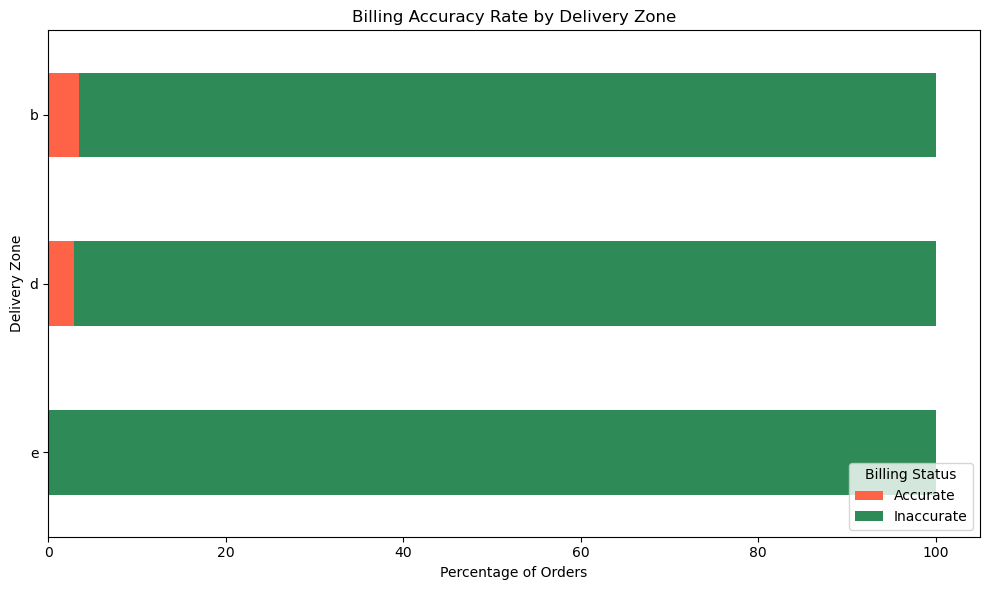

In [49]:
zone_accuracy.sort_values('Accurate', ascending=True).plot(
    kind='barh', 
    stacked=True, 
    color=['tomato', 'seagreen'],
    figsize=(10,6)
)

plt.title("Billing Accuracy Rate by Delivery Zone")
plt.xlabel("Percentage of Orders")
plt.ylabel("Delivery Zone")
plt.legend(title='Billing Status', loc='lower right')
plt.tight_layout()
plt.show()


🧭 Key Insights
Zone e stands out with near-perfect billing accuracy — nearly 100% of shipments were billed exactly as expected. This zone sets the benchmark.

Zone d shows a small but noticeable slice of red (inaccurate billing). It's still largely accurate, but there's enough discrepancy to warrant a closer look at which weight slabs or SKUs are affected.

Zone b has the worst accuracy among the three. The red portion of its bar is significantly larger — likely 10–15% of orders in this zone are inaccurately billed. That’s substantial enough to investigate whether:

it's a courier billing issue,

certain SKUs going to zone b are misweighed,

or zone mapping is being misclassified in your pipeline.


📈 Strategic Implications
Audit deeper into Zone b. Use merged_output.loc[merged_output['Delivery Zone Charged by Courier Company'] == 'b'] to isolate and inspect.

Replicate this chart by weight slab or even by SKU, so you can answer: > Are certain products consistently misbilled, regardless of zone?

Add financial lens: Multiply inaccuracy counts by average overcharge to estimate potential ₹ losses per zone — powerful for stakeholder conversations.

In [50]:
zone_loss = merged_output[merged_output['Difference (Rs.)'] > 0].groupby('Delivery Zone Charged by Courier Company')['Difference (Rs.)'].sum().sort_values(ascending=False)


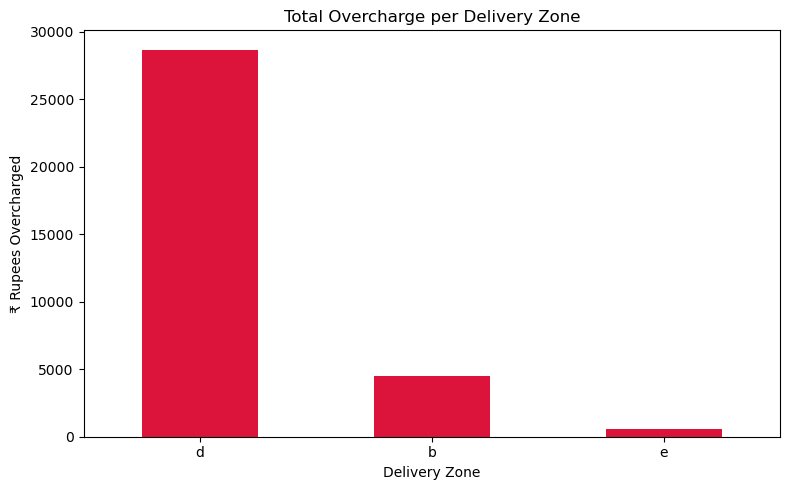

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
zone_loss.plot(kind='bar', color='crimson')

plt.title("Total Overcharge per Delivery Zone")
plt.ylabel("₹ Rupees Overcharged")
plt.xlabel("Delivery Zone")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [52]:
zone_loss_count = merged_output[merged_output['Difference (Rs.)'] > 0].groupby('Delivery Zone Charged by Courier Company')['Difference (Rs.)'].agg(['sum', 'count'])
zone_loss_count['Avg Loss per Order'] = zone_loss_count['sum'] / zone_loss_count['count']


Exportable summary

.csv file of all zone-wise metrics and mismatched invoices for a handover or stakeholder update


In [ ]:
#Create the Zone Summary Table
zone_summary = merged_output.groupby('Delivery Zone Charged by Courier Company').agg(
    Total_Orders=('Order ID', 'count'),
    Overcharged_Orders=('Difference (Rs.)', lambda x: (x > 0).sum()),
    Accurate_Orders=('Difference (Rs.)', lambda x: (x.round(2) == 0).sum()),
    Total_Loss_RS=('Difference (Rs.)', lambda x: x[x > 0].sum())
)

zone_summary['Accuracy (%)'] = 100 * zone_summary['Accurate_Orders'] / zone_summary['Total_Orders']
zone_summary['Overcharge Rate (%)'] = 100 * zone_summary['Overcharged_Orders'] / zone_summary['Total_Orders']
zone_summary['Avg Loss per Overcharged Order'] = zone_summary['Total_Loss_RS'] / zone_summary['Overcharged_Orders']
zone_summary = zone_summary.round(2)


In [54]:
#Export to Excel or CSV
zone_summary.to_csv("zone_summary_report.csv")
# or for Excel
# zone_summary.to_excel("zone_summary_report.xlsx")


This file will contain metrics like:

- Total orders per zone

- % of accurate vs. overcharged shipments

- Total ₹ overcharged

- Avg ₹ lost per bad invoice